In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Importing and loading data

In [2]:
df = pd.read_csv('premier-player-23-24.csv')

In [3]:
df.head()

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team
0,Rodri,es ESP,MF,27,34,34,2931,32.6,8,9,...,0.28,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City
1,Phil Foden,eng ENG,"FW,MF",23,35,33,2857,31.7,19,8,...,0.25,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City
2,Ederson,br BRA,GK,29,33,33,2785,30.9,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City
3,Julián Álvarez,ar ARG,"MF,FW",23,36,31,2647,29.4,11,8,...,0.27,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City
4,Kyle Walker,eng ENG,DF,33,32,30,2767,30.7,0,4,...,0.13,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City


In [4]:
df.columns

Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls_90', 'Ast_90', 'G+A_90',
       'G-PK_90', 'G+A-PK_90', 'xG_90', 'xAG_90', 'xG+xAG_90', 'npxG_90',
       'npxG+xAG_90', 'Team'],
      dtype='object')

In [5]:
df_team = pd.read_csv('epl-team.csv')
df_team

,Team,Point,Gls
0,Arsenal,89,91
1,Aston Villa,68,61
2,Bournemouth,48,54
3,Brentford,39,56
4,Brighton,48,55
5,Burnley,24,41
6,Chelsea,63,77
7,Crystal Palace,49,57
8,Everton,40,40
9,Fulham,47,55


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       580 non-null    object 
 1   Nation       580 non-null    object 
 2   Pos          580 non-null    object 
 3   Age          580 non-null    int64  
 4   MP           580 non-null    int64  
 5   Starts       580 non-null    int64  
 6   Min          580 non-null    int64  
 7   90s          580 non-null    float64
 8   Gls          580 non-null    int64  
 9   Ast          580 non-null    int64  
 10  G+A          580 non-null    int64  
 11  G-PK         580 non-null    int64  
 12  PK           580 non-null    int64  
 13  PKatt        580 non-null    int64  
 14  CrdY         580 non-null    int64  
 15  CrdR         580 non-null    int64  
 16  xG           580 non-null    float64
 17  npxG         580 non-null    float64
 18  xAG          580 non-null    float64
 19  npxG+xAG

In [7]:
df.isna().sum().value_counts()

0    34
Name: count, dtype: int64

In [8]:
# Sửa vị trí thi đấu của cầu thủ
df['Pos'] = df['Pos'].str[:2]
df['Pos']

0      MF
1      FW
2      GK
3      MF
4      DF
       ..
575    DF
576    FW
577    FW
578    MF
579    FW
Name: Pos, Length: 580, dtype: object

# Chia làm 2 phần: Team & Player
### Team
- tổng bàn thắng
- xG vs bàn thắng -> đội nào tạo ra nhiều cơ hội và tận dụng nó tốt hơn (tạo cột cộng xG cầu thủ)
- Check xem tương quan giữa điểm số và xG, bàn thắng và xG
- CrdR & CrdY -> lối chơi phòng ngự quyết liệt hay không?
- Age -> chia cầu thủ thành 3 nhóm: young-age, mid-age, old-age
- Tính thời gian thi đấu của các cầu thủ trẻ (và các nhóm tuổi kia)
- Nation -> EPL chuộng dụng nội binh
- lập bảng so sánh các chỉ số khác
### Player
- tổng bàn thắng, kiến tạo và đóng góp bàn thắng
- mối quan hệ giữa bàn thắng và penalty
- đóng góp bàn thắng của mỗi vị trí
- top ghi bàn của mỗi đội
- PrgC & PrgP & PrgR -> các mẫu cầu thủ thường chọn các cách built-up thế nào
- top cầu thủ thi đấu nhiều nhất
- mối quan hệ giữa tuổi tác vs thời gian thi đấu

### This dataset contains detailed data on all footballers from the 2023/24 premier league season

- Player: The name of the player.
- Nation: The player's nationality.
- Pos: The player's position (e.g., forward, midfielder, defender).
- Age: The player's age.
- MP (Minutes Played): Total minutes played by the player.
- Starts: Number of matches the player started.
- Min (Minutes): Total minutes played by the player (this might be the same as MP).
- 90s (90s Played): The equivalent of 90-minute matches played by the player (e.g., 1.5 = 135 minutes).
- Gls (Goals): Total number of goals scored by the player.
- Ast (Assists): Total number of assists made by the player.
- G+A (Goals + Assists): Total number of goals and assists combined.
- G-PK (Goals - Penalty Kicks): Total number of goals scored excluding penalty kicks.
- PK (Penalty Kicks): Number of penalty goals scored by the player.
- PKatt (Penalty Kicks Attempted): Number of penalty kicks attempted by the player.
- CrdY (Yellow Cards): Number of yellow cards received by the player.
- CrdR (Red Cards): Number of red cards received by the player.
- xG (Expected Goals): The expected number of goals from the player's shots.
- npxG (Non-Penalty Expected Goals): Expected goals excluding penalties.
- xAG (Expected Assists): The expected number of assists from the player's passes.
- npxG+xAG (Non-Penalty xG + xAG): Total of non-penalty expected goals and expected assists.
- PrgC (Progressive Carries): Number of times the player carried the ball forward.
- PrgP (Progressive Passes): Number of passes made by the player that moved the ball forward.
- PrgR (Progressive Runs): Number of times the player made runs forward with the ball.
- Gls (Goals): (Repeated, already defined) Total number of goals scored.
- Ast (Assists): (Repeated, already defined) Total number of assists made.
- G+A (Goals + Assists): (Repeated, already defined) Total number of goals and assists combined.
- G-PK (Goals - Penalty Kicks): (Repeated, already defined) Goals scored excluding penalty kicks.
- G+A-PK (Goals + Assists - Penalty Kicks): Total goals and assists minus penalty goals.
- xG (Expected Goals): (Repeated, already defined) Expected number of goals from the player's shots.
- xAG (Expected Assists): (Repeated, already defined) Expected number of assists from the player's passes.
- xG+xAG (Expected Goals + Expected Assists): Total expected goals and assists.
- npxG (Non-Penalty Expected Goals): (Repeated, already defined) Expected goals excluding penalties.
- npxG+xAG (Non-Penalty xG + Expected Assists): Total of non-penalty expected goals and expected assists.

## 2. Team

In [9]:
# Top 5 đội có số bàn thắng nhiều nhất
df.groupby('Team')['Gls'].sum().sort_values(ascending=False).head()

Team
Manchester City     94
Arsenal             86
Newcastle United    83
Liverpool           80
Chelsea             76
Name: Gls, dtype: int64

In [10]:
# Tổng xG của các đội
c = df.groupby('Team')['xG'].sum().reset_index()
df_team['xG'] = c['xG']
df_team.sort_values(by='xG', ascending=False)

,Team,Point,Gls,xG
10,Liverpool,82,86,90.3
12,Manchester City,91,96,82.0
0,Arsenal,89,91,78.1
14,Newcastle United,60,85,77.7
6,Chelsea,63,77,76.0
17,Tottenham Hotspur,66,74,69.0
1,Aston Villa,68,61,65.2
3,Brentford,39,56,60.2
4,Brighton,48,55,58.0
2,Bournemouth,48,54,57.3


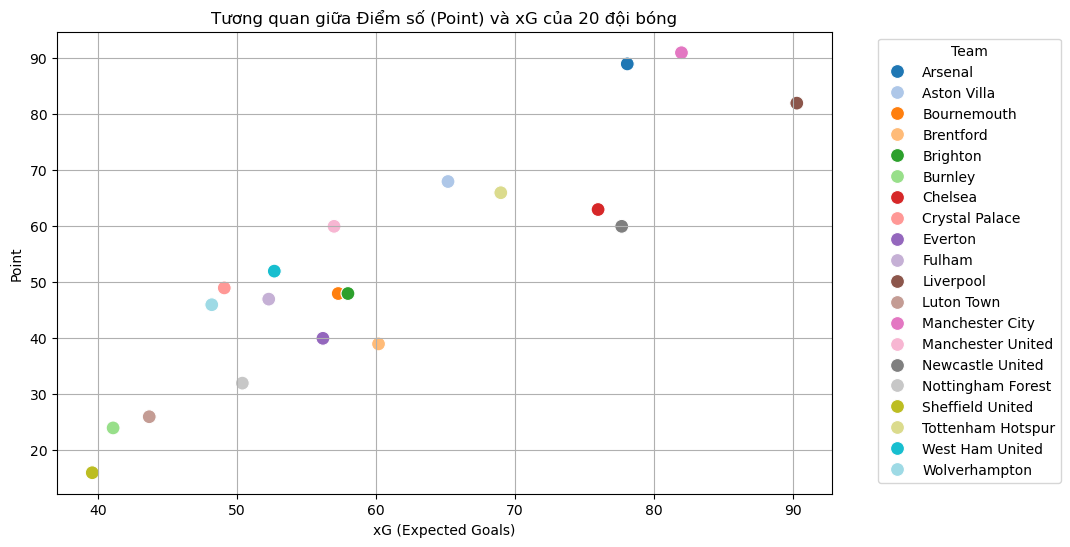

In [11]:
# Vẽ biểu đồ thể hiện sự tương quan giữa bàn thằng kỳ vọng và điểm số
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_team, x='xG', y='Point', hue='Team', palette='tab20', s=100)

plt.title('Tương quan giữa Điểm số (Point) và xG của 20 đội bóng')
plt.xlabel('xG (Expected Goals)')
plt.ylabel('Point')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Team')
plt.grid(True)

*Các đội tạo ra càng nhiều bàn thắng kỳ vọng (xG) thì kiếm đc càng nhiều điểm -> tỉ lệ thuân*

In [12]:
df_team['Gls-xG'] = df_team['Gls'] - df_team['xG']
# Dùng Power BI để vẽ biểu đồ
df_team

,Team,Point,Gls,xG,Gls-xG
0,Arsenal,89,91,78.1,12.9
1,Aston Villa,68,61,65.2,-4.2
2,Bournemouth,48,54,57.3,-3.3
3,Brentford,39,56,60.2,-4.2
4,Brighton,48,55,58.0,-3.0
5,Burnley,24,41,41.1,-0.1
6,Chelsea,63,77,76.0,1.0
7,Crystal Palace,49,57,49.1,7.9
8,Everton,40,40,56.2,-16.2
9,Fulham,47,55,52.3,2.7


*Chỉ số Gls-xG thể hiện đội bóng nào tận dụng các cơ hội mà mình tạo ra tốt hơn*

In [13]:
# Top các đội nhận nhiều thẻ đỏ nhất
df.groupby('Team')['CrdR'].sum().sort_values(ascending=False).head()

Team
Burnley              7
Liverpool            5
Sheffield United     5
Chelsea              4
Tottenham Hotspur    4
Name: CrdR, dtype: int64

In [14]:
# Top các đội nhận nhiều thẻ vàng nhất
df.groupby('Team')['CrdY'].sum().sort_values(ascending=False).head()

Team
Chelsea              108
Wolverhampton        102
Sheffield United     101
Aston Villa           94
Tottenham Hotspur     92
Name: CrdY, dtype: int64

*Dễ thấy trong top các đội nhận nhiều thẻ phạt nhất có 3 đội là Chelsea, Sheffield United và Tottenham Hotspur -> lối chơi của 3 đội này là quyết liệt nhất*

In [15]:
# Phân nhóm tuổi các cầu thủ
def classify_age(age):
    if age <= 23:
        return 'Young_age'
    elif 23 < age < 30:
        return 'Mid_age'
    else:
        return 'Old_age'

df['Group_age'] = df['Age'].apply(classify_age)
df[['Player', 'Age', 'Group_age']]

,Player,Age,Group_age
0,Rodri,27,Mid_age
1,Phil Foden,23,Young_age
2,Ederson,29,Mid_age
3,Julián Álvarez,23,Young_age
4,Kyle Walker,33,Old_age
...,...,...,...
575,Sam Curtis,17,Young_age
576,Daniel Jebbison,19,Young_age
577,Antwoine Hackford,19,Young_age
578,Sydie Peck,18,Young_age


In [16]:
# Tần suất sử dụng các cầu thủ trẻ của các đội
age = pd.pivot_table(df, index='Team', columns='Group_age', values='MP')
age['Young_age'].sort_values(ascending=False)

Team
Manchester City      19.700000
Luton Town           19.500000
Tottenham Hotspur    19.230769
Everton              19.000000
Arsenal              18.888889
Brighton             18.875000
Brentford            18.666667
Bournemouth          18.300000
Crystal Palace       17.900000
Nottingham Forest    17.384615
Wolverhampton        16.909091
Chelsea              16.625000
Burnley              16.357143
Fulham               16.000000
Newcastle United     13.571429
Manchester United    13.416667
Sheffield United     13.187500
Liverpool            12.153846
West Ham United      11.200000
Aston Villa           8.700000
Name: Young_age, dtype: float64

*Phần lớn các đội đều dùng cầu thủ trẻ ở mức gần tương đương nhau, duy chỉ có các đội từ Newcastle United trở xuống đến Aston Villa là ít dùng cầu thủ trẻ hơn*

In [17]:
# Đếm số lượng các cầu thủ theo từng nhóm tuổi của các đội
a = df.groupby(['Team', 'Group_age']).size().unstack(fill_value=0)
a.sum()

Group_age
Mid_age      246
Old_age      103
Young_age    231
dtype: int64

*Dễ thấy số lượng cầu thủ ở Mid_age là nhiều nhất (vì đây là độ tuổi đỉnh cao cầu thủ) và Old_age là ít nhất*
*Tuy nhiên vẫn có 1 số đội ưa thích dùng cầu thủ trẻ hơn như Brighton, Cheasea, Everton, Newcastle United, Liverpool*

In [18]:
# Check cầu thủ nội binh của các đội
df['Nation'] = df['Nation'].str[-3:]

total_players = df.groupby('Team').size().reset_index(name='Số lượng cầu thủ cả đội')
english_players = df[df['Nation'] == 'ENG'].groupby('Team').size().reset_index(name='Số lượng cầu thủ người Anh')
team_stats = pd.merge(total_players, english_players, on='Team', how='left')
team_stats['Số lượng cầu thủ người Anh'].fillna(0, inplace=True)
team_stats['Tỉ lệ cầu thủ người Anh (%)'] = (team_stats['Số lượng cầu thủ người Anh'] / team_stats['Số lượng cầu thủ cả đội']) * 100

team_stats.sort_values(by='Tỉ lệ cầu thủ người Anh (%)', ascending=False)

C:\Users\asus\AppData\Local\Temp\ipykernel_12768\2980245246.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  team_stats['Số lượng cầu thủ người Anh'].fillna(0, inplace=True)


,Team,Số lượng cầu thủ cả đội,Số lượng cầu thủ người Anh,Tỉ lệ cầu thủ người Anh (%)
14,Newcastle United,32,18,56.250000
11,Luton Town,28,15,53.571429
7,Crystal Palace,26,13,50.000000
8,Everton,26,13,50.000000
16,Sheffield United,35,17,48.571429
6,Chelsea,32,14,43.750000
1,Aston Villa,31,12,38.709677
2,Bournemouth,30,11,36.666667
18,West Ham United,26,9,34.615385
4,Brighton,30,10,33.333333


*Vì người Anh là dân tộc có cái tôi lớn, thượng đẳng nên những clb sử dụng nhiều cầu thủ Anh sẽ được cổ động viên Anh quan tâm -> có lợi thế để lôi kéo fan local mới*

### 3.Player

In [19]:
# Tỉ lệ đóng góp bàn thắng theo từng vị trí
goals_by_pos = df.groupby('Pos')['Gls'].sum().reset_index()
total_goals = df['Gls'].sum()
goals_by_pos['Tỉ lệ bàn thắng (%)'] = (goals_by_pos['Gls'] / total_goals) * 100
goals_by_pos

,Pos,Gls,Tỉ lệ bàn thắng (%)
0,DF,164,13.700919
1,FW,720,60.150376
2,GK,0,0.000000
3,MF,313,26.148705


*Dễ hiểu khi các cầu thủ chơi trên hàng công đóng góp bàn thắng nhiều nhất*

In [20]:
# Tỉ lệ đóng góp kiến tạo theo từng vị trí
ast_by_pos = df.groupby('Pos')['Ast'].sum().reset_index()
total_ast = df['Ast'].sum()
ast_by_pos['Tỉ lệ kiến tạo (%)'] = (ast_by_pos['Ast'] / total_ast) * 100
ast_by_pos

,Pos,Ast,Tỉ lệ kiến tạo (%)
0,DF,200,23.282887
1,FW,346,40.279395
2,GK,2,0.232829
3,MF,311,36.204889


*tỉ lệ kiến tạo của cầu thủ chơi ở giữa sân và cầu thủ tấn công gần bằng nhau*  
*đặc biệt vị trí thủ môn cũng có cầu thủ có kiến tạo*

In [21]:
# 2 thủ môn có kiến tạo
df.loc[(df['Pos'] == 'GK') & (df['Ast'] > 0), ['Player', 'Pos', 'Ast', 'Team']]

,Player,Pos,Ast,Team
400,José Sá,GK,1,Wolverhampton
425,Mark Flekken,GK,1,Brentford


In [22]:
# Top ghi bàn của mỗi đội
top_score_by_team = df.loc[df.groupby('Team')['Gls'].idxmax()]
top_score_by_team[['Player', 'Gls', 'Team']]

,Player,Gls,Team
59,Bukayo Saka,16,Arsenal
204,Ollie Watkins,19,Aston Villa
369,Dominic Solanke,19,Bournemouth
429,Yoane Wissa,12,Brentford
345,João Pedro,9,Brighton
524,Jacob Bruun Larsen,6,Burnley
83,Cole Palmer,22,Chelsea
265,Jean-Philippe Mateta,16,Crystal Palace
317,Abdoulaye Doucouré,7,Everton
296,Rodrigo Muniz,9,Fulham


In [23]:
# Top kiến tạo của mỗi đội
top_asist_by_team = df.loc[df.groupby('Team')['Ast'].idxmax()]
top_asist_by_team[['Player', 'Ast', 'Team']]

,Player,Ast,Team
57,Martin Ødegaard,10,Arsenal
204,Ollie Watkins,13,Aston Villa
370,Ryan Christie,5,Bournemouth
433,Bryan Mbeumo,6,Brentford
338,Pascal Groß,10,Brighton
515,Dara O'Shea,4,Burnley
83,Cole Palmer,11,Chelsea
263,Jordan Ayew,7,Crystal Palace
316,Dwight McNeil,6,Everton
289,Andreas Pereira,7,Fulham


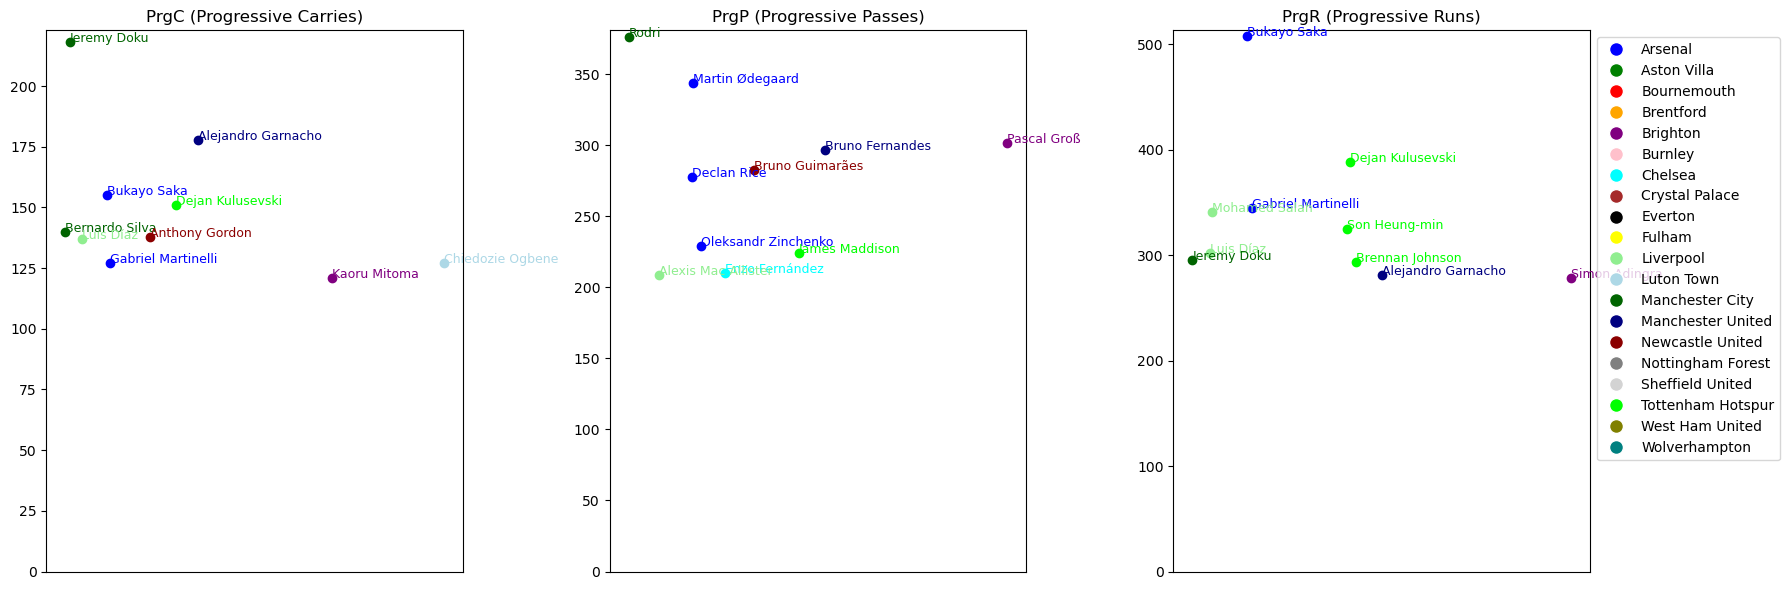

In [24]:
# Cách chơi bóng của các cầu thủ
team_colors = {
    'Arsenal': 'blue', 'Aston Villa': 'green', 'Bournemouth': 'red', 'Brentford': 'orange',
    'Brighton': 'purple', 'Burnley': 'pink', 'Chelsea': 'cyan', 'Crystal Palace': 'brown',
    'Everton': 'black', 'Fulham': 'yellow', 'Liverpool': 'lightgreen', 'Luton Town': 'lightblue',
    'Manchester City': 'darkgreen', 'Manchester United': 'navy', 'Newcastle United': 'darkred', 'Nottingham Forest': 'grey',
    'Sheffield United': 'lightgrey', 'Tottenham Hotspur': 'lime', 'West Ham United': 'olive', 'Wolverhampton': 'teal'
}

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].set_title('PrgC (Progressive Carries)')
top10_prgC = df.nlargest(10, 'PrgC')
for i, row in top10_prgC.iterrows():
    axes[0].scatter(i, row['PrgC'], color=team_colors[row['Team']], label=row['Team'])
    axes[0].text(i, row['PrgC'], row['Player'], fontsize=9, color=team_colors[row['Team']])
axes[0].set_xticks([])
axes[0].set_ylim(0, top10_prgC['PrgC'].max() + 5)

axes[1].set_title('PrgP (Progressive Passes)')
top10_prgP = df.nlargest(10, 'PrgP')
for i, row in top10_prgP.iterrows():
    axes[1].scatter(i, row['PrgP'], color=team_colors[row['Team']], label=row['Team'])
    axes[1].text(i, row['PrgP'], row['Player'], fontsize=9, color=team_colors[row['Team']])
axes[1].set_xticks([])
axes[1].set_ylim(0, top10_prgP['PrgP'].max() + 5)

axes[2].set_title('PrgR (Progressive Runs)')
top10_prgR = df.nlargest(10, 'PrgR')
for i, row in top10_prgR.iterrows():
    axes[2].scatter(i, row['PrgR'], color=team_colors[row['Team']], label=row['Team'])
    axes[2].text(i, row['PrgR'], row['Player'], fontsize=9, color=team_colors[row['Team']])
axes[2].set_xticks([])
axes[2].set_ylim(0, top10_prgR['PrgR'].max() + 5)

axes[2].legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=team,
                                    markerfacecolor=color, markersize=10) 
                        for team, color in team_colors.items()], loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

- Doku của ManCity dẫn đầu chỉ số kéo bóng, cả ManCity và Arsenal đều có 2 cầu thủ đứng top 10
- Rodri của ManCity dẫn đầu chỉ số chuyền tịnh tiến, tuy nhiên Arsenal mới là đội có nhiều cầu thủ chuyền tịnh tiến bóng hơn (3 cầu thủ) -> Arsenal là đội có lối chơi kiểm soát và chuyền bóng tốt nhất
- Saka của Arsenal dẫn đầu chỉ số chạy tịnh tiến nhưng có đến 3 cầu thủ của Tottenham trong top 10 -> Tottenham là đội có lối chơi trực diện, phản công nhanh

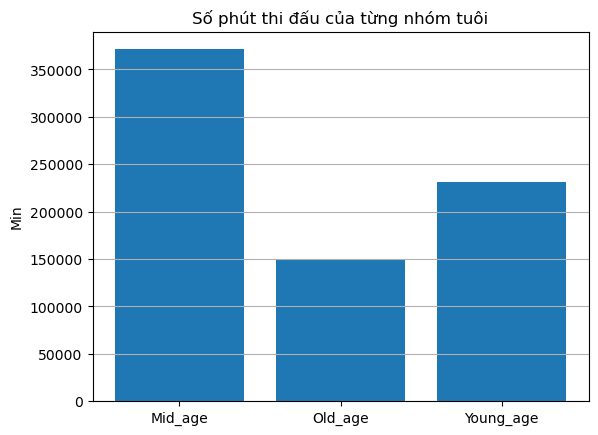

In [25]:
z = df.groupby('Group_age')['Min'].sum().to_frame()

fig, axes = plt.subplots()
axes.bar(z.index, z['Min'])
axes.set(title='Số phút thi đấu của từng nhóm tuôi', ylabel='Min');
axes.grid(axis='y')

*Tổng thời gian thi đấu của nhóm cầu thủ Mid_age cả 2 nhóm kia cộng lại*

In [26]:
# Đọc file từ SQL server
import pyodbc

conn = pyodbc.connect(
    'DRIVER={SQL Server};'
    'SERVER=SON-LE;' 
    'DATABASE=Project EPL;' 
)

query = "SELECT * FROM [Project EPL].dbo.elp"
df1 = pd.read_sql(query, conn)
df1

C:\Users\asus\AppData\Local\Temp\ipykernel_12768\2027638634.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = pd.read_sql(query, conn)


,Player,Nation,Pos,Age,MP,Starts,Min,_90s,Gls,Ast,...,G_A_90,G_PK_90,G_A_PK_90,xG_90,xAG_90,xG_xAG_90,npxG_90,npxG_xAG_90,Team,goal_non_pen
0,Rodri,es ESP,MF,27,34,34,2931,32.599998,8,9,...,0.52,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City,8
1,Phil Foden,eng ENG,"FW,MF",23,35,33,2857,31.700001,19,8,...,0.85,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City,19
2,Ederson,br BRA,GK,29,33,33,2785,30.900000,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City,0
3,Julián Álvarez,ar ARG,"MF,FW",23,36,31,2647,29.400000,11,8,...,0.65,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City,9
4,Kyle Walker,eng ENG,DF,33,32,30,2767,30.700001,0,4,...,0.13,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,Sam Curtis,ie IRL,DF,17,1,0,28,0.300000,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United,0
576,Daniel Jebbison,eng ENG,FW,19,1,0,21,0.200000,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United,0
577,Antwoine Hackford,eng ENG,FW,19,2,0,13,0.100000,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United,0
578,Sydie Peck,eng ENG,MF,18,1,0,10,0.100000,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United,0


In [27]:
df_final = pd.merge(df, df1[['Player', 'goal_non_pen']], on='Player')
df_final

,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,Ast,...,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Team,Group_age,goal_non_pen
0,Rodri,ESP,MF,27,34,34,2931,32.6,8,9,...,0.25,0.52,0.12,0.12,0.24,0.12,0.24,Manchester City,Mid_age,8
1,Phil Foden,ENG,FW,23,35,33,2857,31.7,19,8,...,0.60,0.85,0.33,0.26,0.59,0.33,0.59,Manchester City,Young_age,19
2,Ederson,BRA,GK,29,33,33,2785,30.9,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Manchester City,Mid_age,0
3,Julián Álvarez,ARG,MF,23,36,31,2647,29.4,11,8,...,0.31,0.58,0.44,0.22,0.66,0.39,0.61,Manchester City,Young_age,9
4,Kyle Walker,ENG,DF,33,32,30,2767,30.7,0,4,...,0.00,0.13,0.01,0.09,0.10,0.01,0.10,Manchester City,Old_age,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Sam Curtis,IRL,DF,17,1,0,28,0.3,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United,Young_age,0
596,Daniel Jebbison,ENG,FW,19,1,0,21,0.2,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United,Young_age,0
597,Antwoine Hackford,ENG,FW,19,2,0,13,0.1,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United,Young_age,0
598,Sydie Peck,ENG,MF,18,1,0,10,0.1,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Sheffield United,Young_age,0


In [28]:
df_final.to_csv('output.csv', index=False)

In [29]:
import sqlalchemy
from sqlalchemy import create_engine,text as sql_text
from sqlalchemy.engine import URL
%config Completer.use_jedi = True

In [30]:
df_team.to_csv('output2.csv', index=False)